<a href="https://colab.research.google.com/github/pramodkumhal/ML-Practice/blob/main/Placement-prediction/Ml_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [6]:
df.shape

(100, 4)

In [7]:
df = df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [10]:
df.isnull().sum()

,0
cgpa,0
iq,0
placement,0


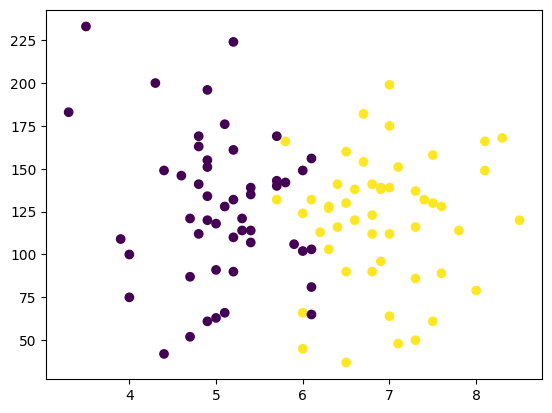

In [13]:
plt.scatter(x='cgpa',y='iq',data=df,c='placement')

In [14]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [15]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [20]:
X_train

,cgpa,iq
70,6.3,127.0
52,7.0,175.0
46,5.3,114.0
76,4.9,155.0
69,8.5,120.0
...,...,...
58,8.0,79.0
20,6.6,120.0
13,6.4,116.0
66,6.9,96.0


In [21]:
Y_train

,placement
70,1
52,1
46,0
76,0
69,1
...,...
58,1
20,1
13,1
66,1


In [23]:
X_test

,cgpa,iq
80,4.9,196.0
6,5.7,143.0
31,3.9,109.0
97,6.7,182.0
92,5.2,110.0
7,5.0,63.0
67,5.0,118.0
45,6.0,66.0
77,7.3,50.0
48,6.6,138.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train = scaler.fit_transform(X_train)

In [28]:
X_train

array([[ 0.23432106,  0.07063997],
       [ 0.84433042,  1.30612438],
       [-0.63712089, -0.2639704 ],
       [-0.98569767,  0.79133921],
       [ 2.15149335, -0.10953484],
       [-0.98569767,  0.68838217],
       [-1.07284187,  0.43098959],
       [-1.50856284,  1.94960584],
       [ 1.1929072 ,  0.19933626],
       [-1.15998606, -0.08379559],
       [ 0.58289784,  0.76559995],
       [-1.42141865,  0.63690365],
       [ 0.84433042, -1.55093333],
       [-0.02711153, -0.00657781],
       [-0.72426509, -0.8817126 ],
       [-0.5499767 , -0.2639704 ],
       [ 1.2800514 ,  0.14785774],
       [-0.72426509,  2.56734805],
       [-1.07284187,  0.99725328],
       [ 1.36719559,  0.09637922],
       [ 0.23432106, -0.54710224],
       [-0.72426509,  0.19933626],
       [-1.15998606, -0.95893038],
       [ 0.93147462,  0.68838217],
       [-2.2057164 ,  2.79900138],
       [ 0.84433042, -0.31544891],
       [ 0.40860945,  0.14785774],
       [-0.81140928,  1.33186364],
       [-0.63712089,

In [29]:
X_test = scaler.transform(X_test)

In [30]:
X_test

array([[-0.98569767,  1.84664881],
       [-0.28854411,  0.4824681 ],
       [-1.85713962, -0.39266669],
       [ 0.58289784,  1.48629919],
       [-0.72426509, -0.36692743],
       [-0.89855348, -1.57667259],
       [-0.89855348, -0.16101336],
       [-0.02711153, -1.49945481],
       [ 1.10576301, -1.91128295],
       [ 0.49575364,  0.35377181]])

In [35]:
from sklearn.linear_model import LogisticRegression

In [40]:
clf = LogisticRegression()

In [41]:
# model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [44]:
Y_pred = clf.predict(X_test)

In [43]:
Y_test

,placement
80,0
6,0
31,0
97,1
92,0
7,0
67,0
45,1
77,1
48,1


In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_test,Y_pred)

0.9

In [47]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

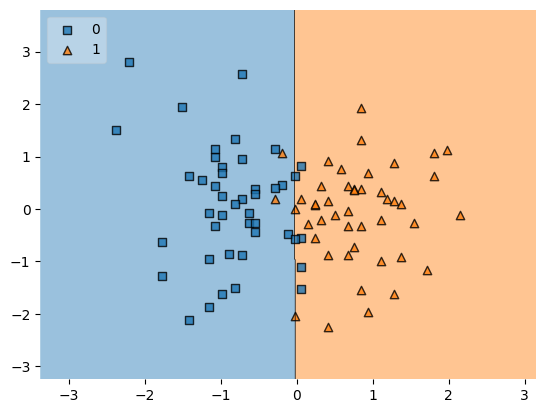

In [48]:
plot_decision_regions(X_train,Y_train.values,clf=clf, legend=2)

In [49]:
#from here you deploy the model in website